In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../DATA/hearing_test.csv')

In [4]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [7]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

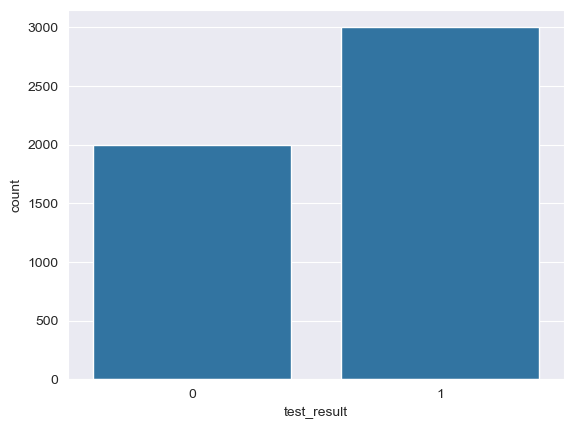

In [8]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

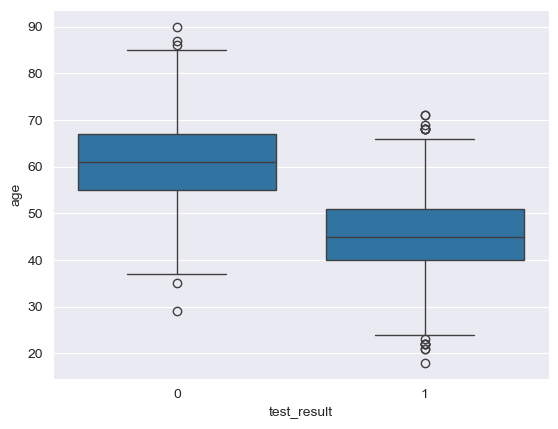

In [9]:
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

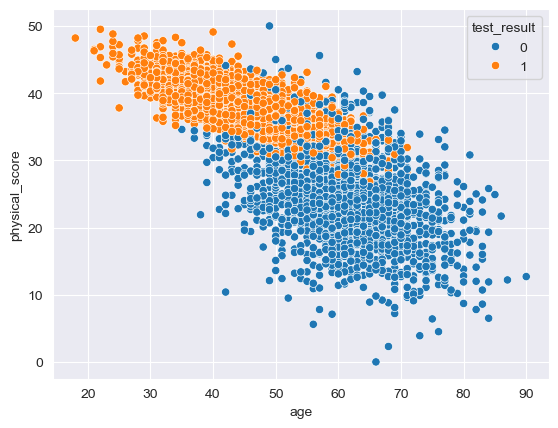

In [10]:
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result')

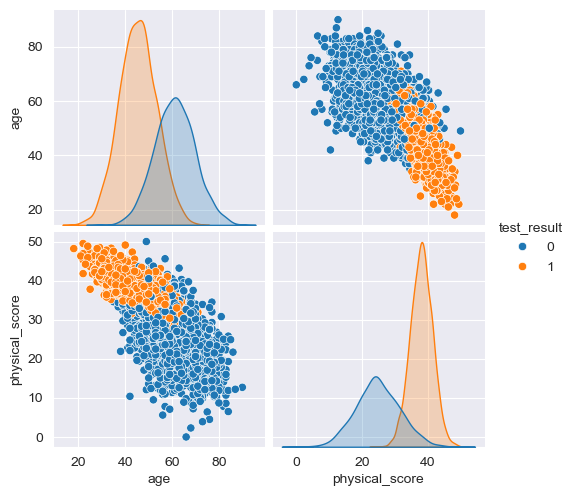

In [13]:
sns.pairplot(data=df, hue='test_result')

<Axes: >

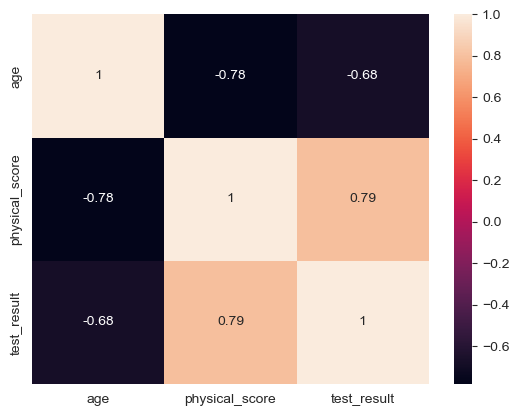

In [16]:
numeric_columns = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

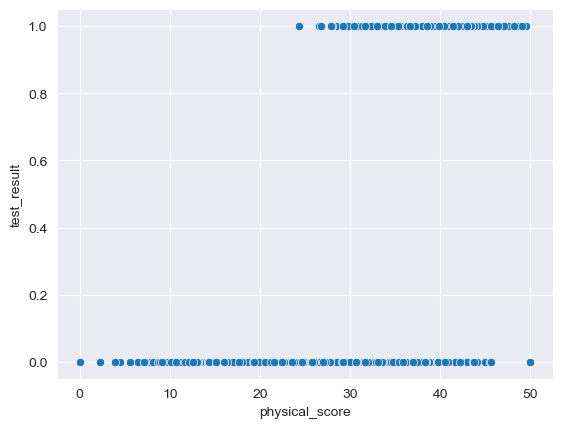

In [17]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

<Axes: xlabel='age', ylabel='test_result'>

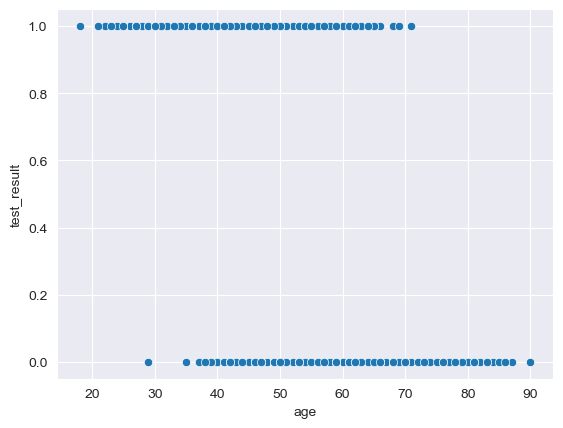

In [18]:
sns.scatterplot(data=df, x='age', y='test_result')

In [19]:
from mpl_toolkits.mplot3d import Axes3D

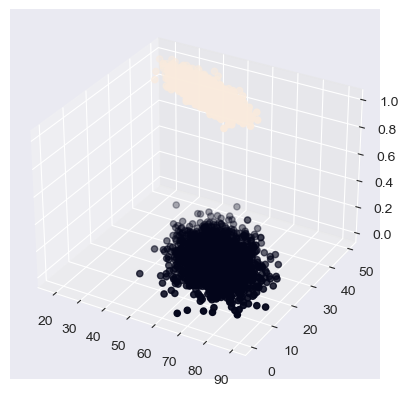

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [21]:
X = df.drop('test_result', axis=1)

In [22]:
y = df['test_result']

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logistic_model = LogisticRegression(n_jobs=-1)

In [40]:
logistic_model.fit(scaled_X_train, y_train)

LogisticRegression(n_jobs=-1)

In [41]:
logistic_model.coef_

array([[-0.95017725,  3.46148946]])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [44]:
y_pred = logistic_model.predict(scaled_X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.93

In [48]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



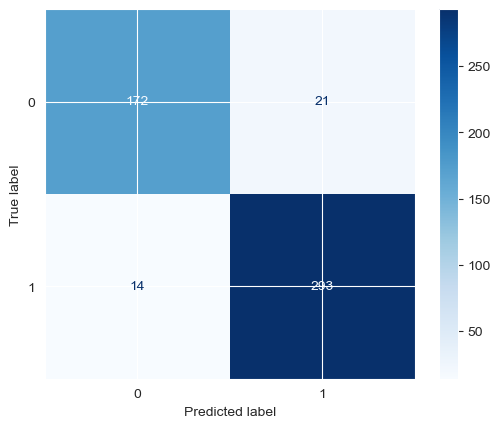

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

In [56]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [57]:
y_train.iloc[0]

1

In [58]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [60]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

In [61]:
display = PrecisionRecallDisplay(precision=precision, recall=recall)

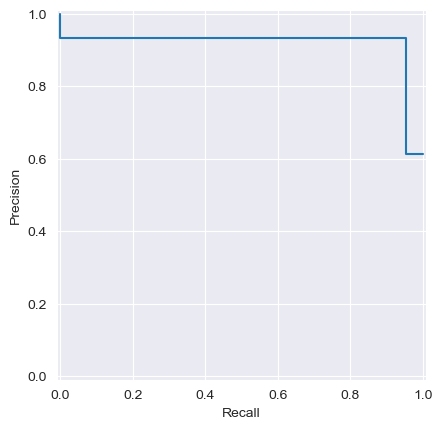

In [62]:
display.plot()